In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

2023-11-15 07:35:53.340247: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Data preparation

In [2]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def make_model(input_shape, conv_filters, conv_kernel_size, pool_size, learning_rate=0.002, momentum=0.8):
    inputs = keras.Input(shape=input_shape)

    cnn_layer = keras.layers.Conv2D(
        conv_filters,
        conv_kernel_size,
        activation='relu',
    )(inputs)
    
    pooling_layer = keras.layers.MaxPooling2D(pool_size=pool_size)(cnn_layer)
    vectors = keras.layers.Flatten()(pooling_layer)
    inner = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    loss = keras.losses.BinaryCrossentropy()
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [4]:
# total images in train/test is 4595
# validation_split is 0.25
train_data_dir = './data/train'
test_data_dir = './data/test'
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.25)

train_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='training',
    class_mode='binary',
)

val_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

Found 2758 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [5]:
train_ds.class_indices, val_ds.class_indices

({'bee': 0, 'wasp': 1}, {'bee': 0, 'wasp': 1})

In [6]:
model = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

2023-11-15 07:35:54.960630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 07:35:54.967863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 07:35:54.968494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 07:35:54.969433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2023-11-15 07:35:57.084794: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-15 07:35:57.715145: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 07:35:57.716012: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 07:35:57.716050: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-15 07:35:57.716971: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 07:35:57.717053: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


87/87 [==============================] - 10s 89ms/step - loss: 0.6566 - accuracy: 0.6099 - val_loss: 0.5818 - val_accuracy: 0.7301
Epoch 2/10
87/87 [==============================] - 8s 87ms/step - loss: 0.5417 - accuracy: 0.7350 - val_loss: 0.5228 - val_accuracy: 0.7486
Epoch 3/10
87/87 [==============================] - 8s 87ms/step - loss: 0.4862 - accuracy: 0.7719 - val_loss: 0.5193 - val_accuracy: 0.7388
Epoch 4/10
87/87 [==============================] - 8s 86ms/step - loss: 0.4146 - accuracy: 0.8231 - val_loss: 0.5248 - val_accuracy: 0.7476
Epoch 5/10
87/87 [==============================] - 8s 88ms/step - loss: 0.3626 - accuracy: 0.8611 - val_loss: 0.5173 - val_accuracy: 0.7563
Epoch 6/10
87/87 [==============================] - 8s 87ms/step - loss: 0.3305 - accuracy: 0.8666 - val_loss: 0.5546 - val_accuracy: 0.7095
Epoch 7/10
87/87 [==============================] - 7s 86ms/step - loss: 0.2861 - accuracy: 0.8869 - val_loss: 0.5669 - val_accuracy: 0.7182
Epoch 8/10
87/87 [=====

# Question 1

In [8]:
# use binary cross entropy loss function for binary classification

# Question 2

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

# Question 3

In [10]:
train_data_gen2 = ImageDataGenerator(rescale=1./255)
train_gen2 = train_data_gen2.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen2 = ImageDataGenerator(rescale=1./255)
test_gen2 = test_data_gen2.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

model2 = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [11]:
hist2 = model2.fit(
    train_gen2,
    epochs=10,
    validation_data=test_gen2
)

Epoch 1/10
184/184 [==============================] - 10s 50ms/step - loss: 0.6840 - accuracy: 0.5469 - val_loss: 0.6400 - val_accuracy: 0.6590
Epoch 2/10
184/184 [==============================] - 9s 49ms/step - loss: 0.6274 - accuracy: 0.6492 - val_loss: 0.5751 - val_accuracy: 0.7081
Epoch 3/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5668 - accuracy: 0.7202 - val_loss: 0.5373 - val_accuracy: 0.7484
Epoch 4/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5321 - accuracy: 0.7487 - val_loss: 0.5321 - val_accuracy: 0.7516
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.4930 - accuracy: 0.7724 - val_loss: 0.5021 - val_accuracy: 0.7614
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4667 - accuracy: 0.7895 - val_loss: 0.5316 - val_accuracy: 0.7429
Epoch 7/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4542 - accuracy: 0.7914 - val_loss: 0.5169 - val_accuracy: 0.746

In [12]:
hist2.history

{'loss': [0.6839776039123535,
  0.6274035573005676,
  0.5667725205421448,
  0.5321293473243713,
  0.49297329783439636,
  0.46669018268585205,
  0.4541541337966919,
  0.4281201958656311,
  0.39701613783836365,
  0.3596350848674774],
 'accuracy': [0.5469132661819458,
  0.6491705179214478,
  0.7201523184776306,
  0.748708188533783,
  0.7723687887191772,
  0.7895023226737976,
  0.7914060354232788,
  0.8093554377555847,
  0.8300244808197021,
  0.8561327457427979],
 'val_loss': [0.639959454536438,
  0.5751366019248962,
  0.5373030304908752,
  0.5320919752120972,
  0.5020678043365479,
  0.5315564274787903,
  0.5169405341148376,
  0.4949134588241577,
  0.5050123929977417,
  0.486267626285553],
 'val_accuracy': [0.6590414047241211,
  0.7080609798431396,
  0.7483659982681274,
  0.7516340017318726,
  0.7614378929138184,
  0.742919385433197,
  0.7461873888969421,
  0.772331178188324,
  0.7636165618896484,
  0.772331178188324]}

In [13]:
np.median(hist2.history['accuracy'])

0.7809355556964874

# Question 4

In [14]:
np.mean(hist2.history['loss']), np.std(hist2.history['loss'])

(0.500887206196785, 0.09710709124152314)

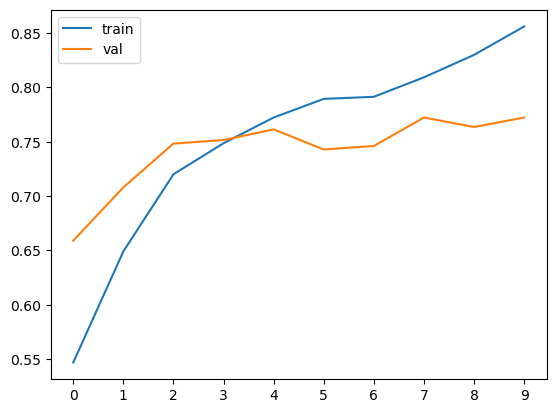

In [15]:
plt.plot(hist2.history['accuracy'], label='train')
plt.plot(hist2.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [16]:
train_data_gen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
train_gen3 = train_data_gen3.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
test_gen3 = test_data_gen3.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

hist3 = model2.fit(
    train_gen3,
    epochs=10,
    validation_data=test_gen3
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Epoch 1/10
184/184 [==============================] - 29s 159ms/step - loss: 0.4949 - accuracy: 0.7718 - val_loss: 0.5183 - val_accuracy: 0.7549
Epoch 2/10
184/184 [==============================] - 29s 157ms/step - loss: 0.4848 - accuracy: 0.7729 - val_loss: 0.5004 - val_accuracy: 0.7636
Epoch 3/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4772 - accuracy: 0.7808 - val_loss: 0.4938 - val_accuracy: 0.7538
Epoch 4/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4756 - accuracy: 0.7822 - val_loss: 0.4695 - val_accuracy: 0.7930
Epoch 5/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4811 - accuracy: 0.7770 - val_loss: 0.4647 - val_accuracy: 0.7843
Epoch 6/10
184/184 [==============================] - 29s 157ms/step - loss: 0.4646 - accuracy: 0.7852 - val_loss: 0.5163 - val_accuracy: 0.7647
Epoch 7/10
184/184 [===========================

In [17]:
hist3.history

{'loss': [0.4948725402355194,
  0.48481136560440063,
  0.4772433340549469,
  0.4756017029285431,
  0.4810647666454315,
  0.4646070897579193,
  0.4692181944847107,
  0.46020665764808655,
  0.45938122272491455,
  0.4573298692703247],
 'accuracy': [0.771824836730957,
  0.7729126811027527,
  0.7807995676994324,
  0.7821593880653381,
  0.77699214220047,
  0.785150945186615,
  0.7886864542961121,
  0.7829752564430237,
  0.788414478302002,
  0.7946695685386658],
 'val_loss': [0.5183098912239075,
  0.5004154443740845,
  0.49381008744239807,
  0.46954312920570374,
  0.46469393372535706,
  0.5162662863731384,
  0.47200480103492737,
  0.4790700674057007,
  0.46971556544303894,
  0.46269887685775757],
 'val_accuracy': [0.7549019455909729,
  0.7636165618896484,
  0.7538126111030579,
  0.7930282950401306,
  0.7843137383460999,
  0.7647058963775635,
  0.7930282950401306,
  0.7788671255111694,
  0.772331178188324,
  0.7908496856689453]}

# Question 5

In [20]:
np.mean(hist3.history['val_loss'])

0.48465280830860136

# Question 6

In [21]:
np.mean(hist3.history['val_accuracy'][5:])

0.7799564361572265